# Assignment 1

## Introduction

## Data cleaning
### Read in and merge the two data sets (tip: think of different CSV formats that exist)

In [1]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
import sklearn as sk


In [2]:
df1 = pd.read_csv("survey.csv")
df1.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [3]:
df2 = pd.read_csv("steps.csv", sep = ";")
#df2 = df2.fillna(0)
df2.head()


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = pd.merge(df1, df2, on = "id") #'id' is the common identifier


### Clean the data: remove impossible values

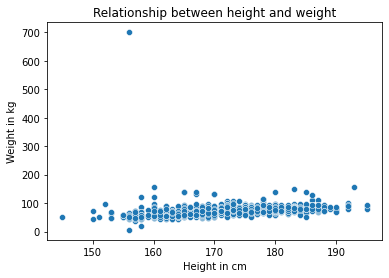

In [5]:
sns.scatterplot(x="height", y="weight", data=df)
plt.title("Relationship between height and weight")
plt.xlabel("Height in cm")
plt.ylabel("Weight in kg")
plt.show()

The data visualisation shows data points with weights over 700kg or 0kg, which cannot be physically possible. Therefore these data points have been marked as an outlier due to improper data-entry and will be removed in a new dataframe in the next step.

In [6]:
df = df.fillna(0)
df = df[(df["weight"] < 200) & (df["weight"] > 40)]
df = df[(df["height"] < 250) & (df["height"] > 100)]
df.head()



,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,...,3914.0,4364.0,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Create the variable mean steps per participant. Hint: combine Pandas .loc and .mean() with the right axis argument (axis=....) for mean(). Look up the documentation of .loc and Pandas .mean() if you're unsure.

In [7]:
df["mean_steps"] = df.iloc[0:,5:337].mean(axis=1)
df["bmi"] = df["weight"]/((df["height"]/100)*df["height"]/100)

C:\Users\labub\AppData\Local\Temp/ipykernel_19092/4725166.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df["mean_steps"] = df.iloc[0:,5:337].mean(axis=1)


### Show the head() of the resulting data frame

## Feature engineering
- The prediction of the model can be improved by computing a variable that gives a better indication of a healthy weight than weight alone. Can you think of one? If not, just skip this step.

## Exploratory data analysis
- An analysis of mean steps per participant:
- Graph of the distribution (e.g., histogram, box plot, density plot, violin plot)
- Summary statistics (measure of central tendency and variation, e.g., mean, median, variance)
- Verbal description of the distribution, including commenting on normality, skewness, outliers, etc.
- The relation of mean steps per participant with two categorical variables (e.g. gender, age, education)
- Graph of the relation (e.g. histograms, box plots, density plots, violin plots). Try a different plot this time.
- Describe and interpret the results

- See last week for the first part (distribution of steps). In addition:
- Make a scatterplot matrix of the numerical variables
- Make a correlation matrix of the numerical variables
- Describe and interpret the results

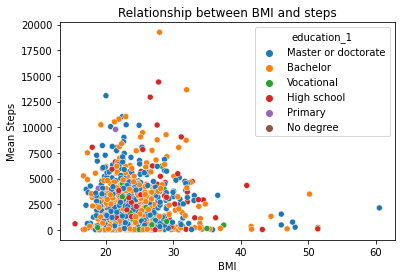

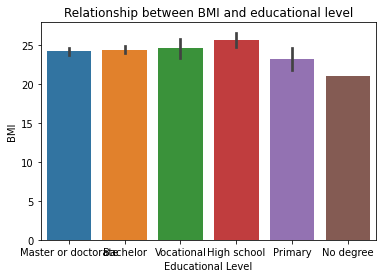

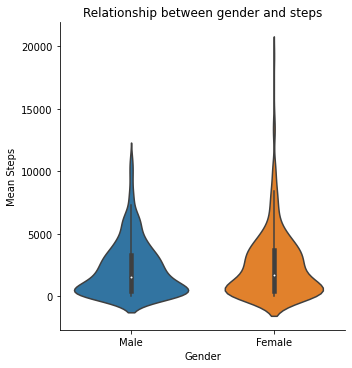

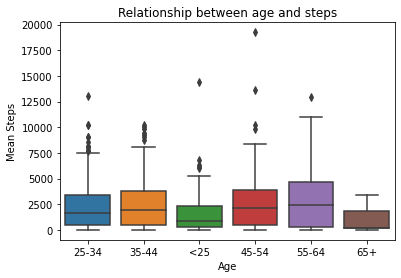

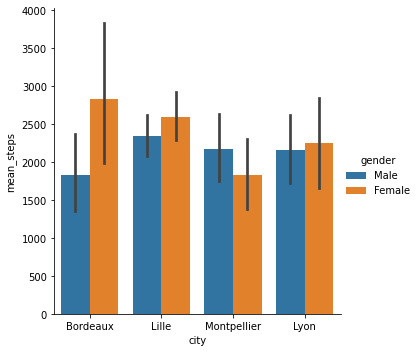

In [80]:
sns.scatterplot(x="bmi", y="mean_steps", hue="education_1", data=df)
plt.title("Relationship between BMI and steps")
plt.xlabel("BMI")
plt.ylabel("Mean Steps")
plt.show()
sns.barplot(x="education_1", y="bmi", data=df)
plt.title("Relationship between BMI and educational level")
plt.xlabel("Educational Level")
plt.ylabel("BMI")
plt.show()
sns.catplot(x="gender", y="mean_steps", kind="violin", data=df)
plt.title("Relationship between gender and steps")
plt.xlabel("Gender")
plt.ylabel("Mean Steps")
plt.show()
sns.boxplot(x="age", y="mean_steps", data=df)
plt.title("Relationship between age and steps")
plt.xlabel("Age")
plt.ylabel("Mean Steps")
plt.show()
sns.catplot(x="city", y="mean_steps", kind="bar", hue="gender", data=df)
plt.show()

Results' Interpretations:

1- People with teritiary education tend to be more active.

2- People with highschool as an educational background have a higher than average body mass (BMI).

3- (55-64) age group is the most active, while 65+ and people under 25 are the least active.

4- Females are more active than males on average with the exception of the city of Montpellier.

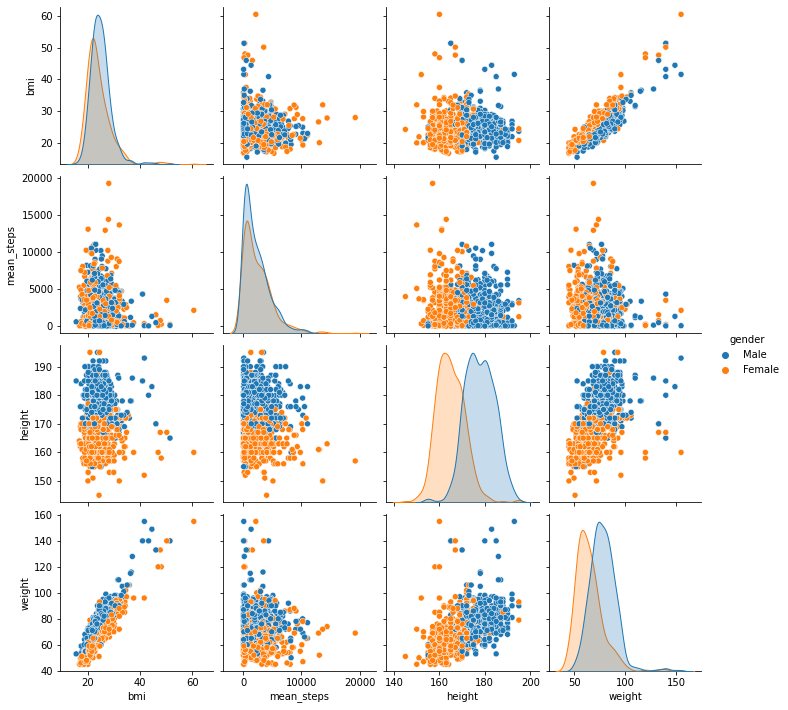

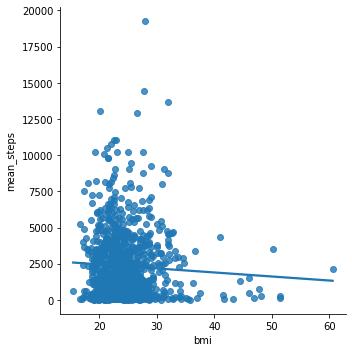

In [99]:
df_subset = df[["age","gender","city","education_1","bmi","mean_steps", "height","weight"]]
sns.pairplot(df_subset, hue="gender")
plt.show()
sns.lmplot(x='bmi', y='mean_steps', data=df, ci=False)
plt.show()

Results' Interpretations:

1- There is a negative correlation between weight and activity.

2- There is a negative correlation between activity and body mass (BMI).

3- Females have a higher BMI on average.

## Predictive model
- Explain linear regression in your own words
- Create dummy variables for the categorical variables
- Fit a linear regression model to predict the mean steps per participant, using the training data. You can include all variables (easy), or you can try to find the combination that gives you the best fit (harder).

In [101]:
from sklearn.linear_model import LinearRegression
x = df[['bmi']] 
y = df['mean_steps']
lm = LinearRegression() 
lm.fit(x, y) 

b0 = lm.intercept_ 
b1 = lm.coef_[0]

df["p_steps"] = lm.predict(x) 
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps,bmi,p_steps
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5088.190332,30.930438,2147.669036
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2801.540785,23.765432,2347.601200
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,...,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0,3712.752266,25.617284,2295.927168
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,220.311178,25.249337,2306.194345
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,867.332326,21.872423,2400.423687


The regression line is equal to:  

$y = 3010.751 + -27.904X$

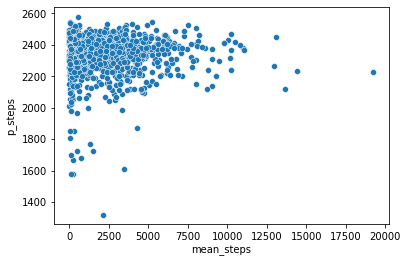

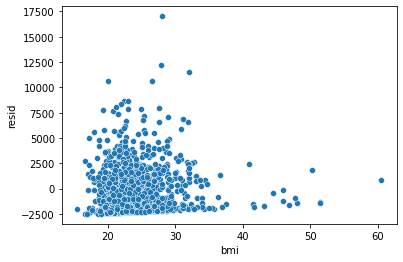

In [104]:
df["resid"] = df["mean_steps"] - df["p_steps"]


## Evaluation
- Evaluate the model on the test data
- Predictive power of the model (R2, RMSE)
- Investigate the residuals
- Describe and interpret the results

In [110]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
print("The R squared value is: " + str(r2_score(df["mean_steps"], df['p_steps'])))
print("RSME = " + str(sqrt(mean_squared_error(df["mean_steps"], df["p_steps"]))))

The R squared value is: 0.0028850467880169317
RSME = 2389.3538595400537


## Conclusion

- R squared value is very low, indicating that the model is not accurate at predicting steps.
- Average residual is relatively high, and in many cases it is few times fold the original value. This also indicates that the model is inaccurate.